In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from imblearn.over_sampling import SMOTE

In [2]:
dataset = pd.read_csv("wage_predict.csv")
print(dataset)


     industry  occupation  yrs_qual  sex  highest_qual  area_of_study  \
0           Q           2        19    1            13              4   
1           C           9        14    1            11              7   
2           L           3        16    2            12              4   
3           Q           5        12    2             7              4   
4           P           1        18    1            13              4   
...       ...         ...       ...  ...           ...            ...   
2000        N           3        12    2             7              8   
2001        C           3        16    1            12              4   
2002        Q           1        18    2            13              4   
2003        M           4        12    2             7              4   
2004        G           5        12    2             7              7   

      influencing  negotiating  sector  workforce_change  ...  advising  \
0               2            1       1          

In [3]:
dataset.isnull().sum()

industry                 0
occupation               0
yrs_qual                 0
sex                      0
highest_qual             0
area_of_study            0
influencing              0
negotiating              0
sector                   0
workforce_change         0
no_subordinates          0
choose_hours             0
choose_method            0
job_quals                0
qual_needed              0
experience_needed        0
keeping_current          0
satisfaction             0
advising                 0
instructing              0
problem_solving_quick    0
problem_solving_long     0
labour                   0
manual_skill             0
computer                 0
group_meetings           0
computer_level           0
monthly_salary           0
dtype: int64

In [4]:
dataset.dtypes


industry                  object
occupation                 int64
yrs_qual                   int64
sex                        int64
highest_qual               int64
area_of_study              int64
influencing                int64
negotiating                int64
sector                     int64
workforce_change           int64
no_subordinates            int64
choose_hours               int64
choose_method              int64
job_quals                  int64
qual_needed                int64
experience_needed          int64
keeping_current            int64
satisfaction               int64
advising                   int64
instructing                int64
problem_solving_quick      int64
problem_solving_long       int64
labour                     int64
manual_skill               int64
computer                   int64
group_meetings             int64
computer_level             int64
monthly_salary           float64
dtype: object

In [5]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2000    False
2001    False
2002    False
2003    False
2004    False
Length: 2005, dtype: bool

In [6]:
x = dataset.drop(['monthly_salary','industry'], axis=1)
y = dataset['monthly_salary']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [10]:
# ...existing code...
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from imblearn.over_sampling import SMOTE
# ...existing code...
smote = SMOTE()
# SMOTE is for classification, not regression. Remove SMOTE for regression tasks.
# Use x_train and y_train directly for regression.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
print("R2 score: ", r2_score(y_test, y_pred))

R2 score:  0.4444074379842703


In [11]:

print("MAE score: ", mean_absolute_error(y_test,y_pred))
print("MSE score: ", mean_squared_error(y_test,y_pred))
print("RMSE score: ", np.sqrt (mean_squared_error(y_test,y_pred)))

MAE score:  1817.6180581649712
MSE score:  9106420.541184869
RMSE score:  3017.6846324930757


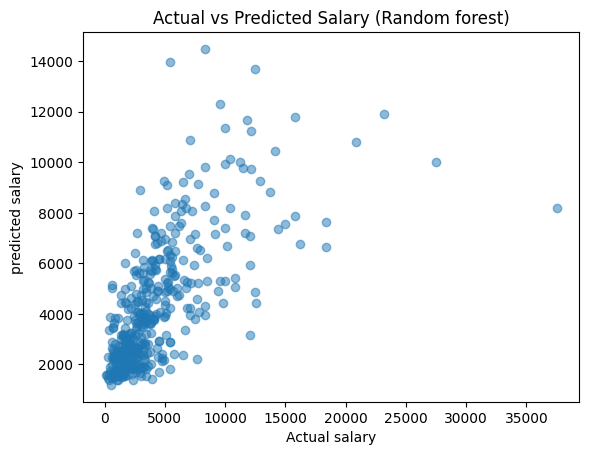

In [12]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Actual salary")
plt.ylabel("predicted salary")
plt.title("Actual vs Predicted Salary (Random forest)")
plt.show()